<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/datasets/Part%201%20-%20Artificial%20Neural%20Networks%20(ANN)/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [ ]:
#!git clone https://github.com/joanby/deeplearning-az.git

Cloning into 'deeplearning-az'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 10167 (delta 35), reused 44 (delta 20), pack-reused 10096
Receiving objects: 100% (10167/10167), 236.96 MiB | 24.11 MiB/s, done.
Resolving deltas: 100% (60/60), done.
Checking out files: 100% (10110/10110), done.


In [1]:
!git clone https://github.com/pacomm5/deeplearning-az
# esto nos abrirá provisionalmente una carpeta con todos los datos en temporal de google colab, en este caso la carpeta deeplearning-az

fatal: destination path 'deeplearning-az' already exists and is not an empty directory.


# Damos acceso a nuestro Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Test it

In [ ]:
!ls '/content/drive/My Drive' 

'2019_097 Audi Service News - Campaña Modelo de predicción de abandono.msg'
'31 de agosto.xlsx'
'Acuerdos_Preformance meeting_Junio17- Jarmauto_v1.pdf'
 C3942BF2-8A67-4F4F-B37D-7656F1E356DD.doc
'Chalet Loranca.doc'
 characters-simpsons.csv
'Colab Notebooks'
'Copia de Clasificacion-1.ipynb'
'Copia de Clasificación-2.ipynb'
'Copia de Clustering.ipynb'
'Copia de EDA-Feature_Selection.ipynb'
'Copia de Feature_Engineering.ipynb'
'Copia de Regression.ipynb'
'Copia de requirements.txt'
'Copy of 1. Les verbes en -ER-Rosa (1).pdf'
'Copy of 1. Les verbes en -ER-Rosa.pdf'
 curriculum.doc
 curriculum.doc.gdoc
'Escaneado 21 ago 2016 3.21.pdf'
 HS3ABA.ZIP
 HS4EF4.ZIP
'HS4EF4.ZIP (Unzipped Files)'
 HS6.ZIP
 HS7859.ZIP
'HS7859.ZIP (Unzipped Files)'
 HSA151.ZIP
 HSA9B3.ZIP
 HSD86A.ZIP
'HSD86A.ZIP (Unzipped Files)'
 Inversión.gsheet
 jarmauto
 JARMAUTO2
 Justificante.pdf
 kaggle
 libros
'parque jarmauto (1).docx.gdoc'
'parque jarmauto.docx'
'parque jarmauto.docx.gdoc'
'Performance meeting17_Comun_v8

# Google colab tools

In [2]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [3]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Instalar Theano

In [ ]:
!pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning git://github.com/Theano/Theano.git to /tmp/pip-req-build-cctpydfn
  Running command git clone -q git://github.com/Theano/Theano.git /tmp/pip-req-build-cctpydfn
  fatal: unable to connect to github.com:
  github.com[0: 140.82.112.4]: errno=Connection timed out

ERROR: Command errored out with exit status 128: git clone -q git://github.com/Theano/Theano.git /tmp/pip-req-build-cctpydfn Check the logs for full command output.


# Instalar Tensorflow y Keras


In [4]:
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Redes Neuronales Artificales

# Cómo importar las librerías


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [6]:
dataset = pd.read_csv('/content/deeplearning-az/datasets/Part 1 - Artificial Neural Networks (ANN)/Churn_Modelling.csv')


In [8]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
X = dataset.iloc[:, 3:13].values # incluye desde la tercera a la 13, no inclusive. esta es la matriz de características. 
y = dataset.iloc[:, 13].values # aqui solo la variable dependiente. 

In [10]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [11]:
y

array([1, 0, 1, ..., 1, 1, 0])

# Parte 1 - Pre procesado de datos

# Codificar datos categóricos

tenemos dos variables categoricas

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X_1 = LabelEncoder() # la primera variable categorica le llamamos X_1
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1]) # cogemos la columna 1 y hacemos un fittrasnform


In [13]:
X # aqui ya vemos que no aparece la columna pais, sino que la ha codificado con 0 y 1, y 2

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [9]:
labelencoder_X_2 = LabelEncoder() # aqui lo mismo con la otra. 
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])


In [15]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [10]:
# ahora lo que nos toca es separar los 0 1 2 y lo que sea. solo lo hacemos con los paises ya que en el genero solo tenemso 0 y 1
onehotencoder = ColumnTransformer( # 
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [1])],   
    remainder='passthrough'                        
)
X = onehotencoder.fit_transform(X)
X = X[:, 1:] # con esto evitamos el problema de la multicolinealidad, es decir si tenemos tres paises, no ponemos tres columnas sino dos. 
# en el genero igual, si tenemos dos quitamos una y nos quedamos con una. 

In [ ]:
X

array([[0.0, 0.0, 619, ..., 1, 1, 101348.88],
       [0.0, 1.0, 608, ..., 0, 1, 112542.58],
       [0.0, 0.0, 502, ..., 1, 0, 113931.57],
       ...,
       [0.0, 0.0, 709, ..., 0, 1, 42085.58],
       [1.0, 0.0, 772, ..., 1, 0, 92888.52],
       [0.0, 0.0, 792, ..., 1, 0, 38190.78]], dtype=object)

# Dividir el data set en conjunto de entrenamiento y conjunto de testing

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Escalado de variables

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [19]:
X_train

array([[-0.5698444 ,  1.74309049,  0.16958176, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [ 1.75486502, -0.57369368, -2.30455945, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-0.5698444 , -0.57369368, -1.19119591, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [-0.5698444 , -0.57369368,  0.9015152 , ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.5698444 ,  1.74309049, -0.62420521, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [ 1.75486502, -0.57369368, -0.28401079, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [20]:
X_test

array([[ 1.75486502, -0.57369368, -0.55204276, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-0.5698444 , -0.57369368, -1.31490297, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [-0.5698444 ,  1.74309049,  0.57162971, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.5698444 ,  1.74309049, -0.74791227, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [ 1.75486502, -0.57369368, -0.00566991, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [ 1.75486502, -0.57369368, -0.79945688, ...,  0.64259497,
        -1.03227043,  1.61255917]])

# Parte 2 - Construir la RNA

# Importar Keras y librerías adicionales


In [27]:

import keras
from keras.models import Sequential # esta es para inicializar 
from keras.layers import Dense # esta es para crear las capas intermedias. 
from keras.layers import Dropout

# Inicializar la RNA

In [22]:
classifier = Sequential() # creamos el modelo, lo inicicializamos. 

# Añadir las capas de entrada y primera capa oculta


In [ ]:
X.shape

(10000, 11)

In [23]:
# empezamos a meter capas, la de entrada y la capa oculta. 
classifier.add(Dense(units = 6, kernel_initializer = "uniform",  
                     activation = "relu", input_dim = 11))
# imput dim son las variables que tenemos. Utilizamos relu (rectificador) para activar 
# en la capa de salida utilizaremos la sigmoide. esta en los apuntes anteriores lo que es cada una. 
# unit es el número de nodos de la capa oculta. una regla  o consejo es fijar la media entre los nodos de entrada y salida. como tenemos 11 de entrada y 1 de salida la media ponemos 6
# kernel_initializer es como iniciamos esos pesos, uniform serán pequeños y cercanos a 0.

# Añadir la segunda capa oculta

In [24]:
classifier.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))
# no hace falta meter el input dim, porque ya lo conoce la anterior que son 6 nodos. 

# Añadir la capa de salida

In [25]:
classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))
# como dijimos arriba para la de salida utilizamos la función de activación sigmoid. 
# units 1, ya que es la de salida. Ya que solo queremos clasificar solo en dos categorías.

# Compilar la RNA

In [26]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
# Vamos a compilar. optimizer adam (buscar el conjunto optimo de pesos y hemos elegido adam)
# loss la función de perdidas es la que minimiza el error. binary_crossentropy 
# metric  son las matericas que queremos que utilice para mejorar en entrenamiento

# Ajustamos la RNA al Conjunto de Entrenamiento. ME QUEDO AQUI

In [27]:
classifier.fit(X_train, y_train,  batch_size = 10, epochs = 100)
# lote de 10 en 10 y epoch numeros de veces que queramos que haga. pasa 100 veces por la red neuronal. 
# lotes de 10  en 10 y cada vez que lo hacemos corregimos pesos. 

Epoch 1/100
800/800 [==============================] - 5s 2ms/step - loss: 0.4859 - accuracy: 0.7959
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4255 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4179 - accuracy: 0.8177
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4133 - accuracy: 0.8303
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4090 - accuracy: 0.8330
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4069 - accuracy: 0.8334
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4049 - accuracy: 0.8350
Epoch 8/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4033 - accuracy: 0.8344
Epoch 9/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4017 - accuracy: 0.8364
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4013 - accura

# Parte 3 - Evaluar el modelo y calcular predicciones finales

# Predicción de los resultados con el Conjunto de Testing

In [28]:
# arriba hemos lo hemos hecho sobre el train ahora lo vamos a hacer sobre el test.
# es decir vamos a ver como se comporta el modelo. 
y_pred  = classifier.predict(X_test)
y_pred = (y_pred>0.5) # le ponemos el umbral en 0.5, umbral de abandono. 
# podemos poner otro numero, depende de lo que estemeos calculando. 

In [29]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Elaborar una matriz de confusión

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [31]:
cm

array([[1534,   61],
       [ 208,  197]])

In [32]:
(1534+197)/(1534+61+208+197)

0.8655

# AQUI VAMOS A HACER EL EJERCICIO PROPUESTO

Vamos a utilizar nuestro modelo de RNA para predecir si un cliente se va a marachar o no del banco. 

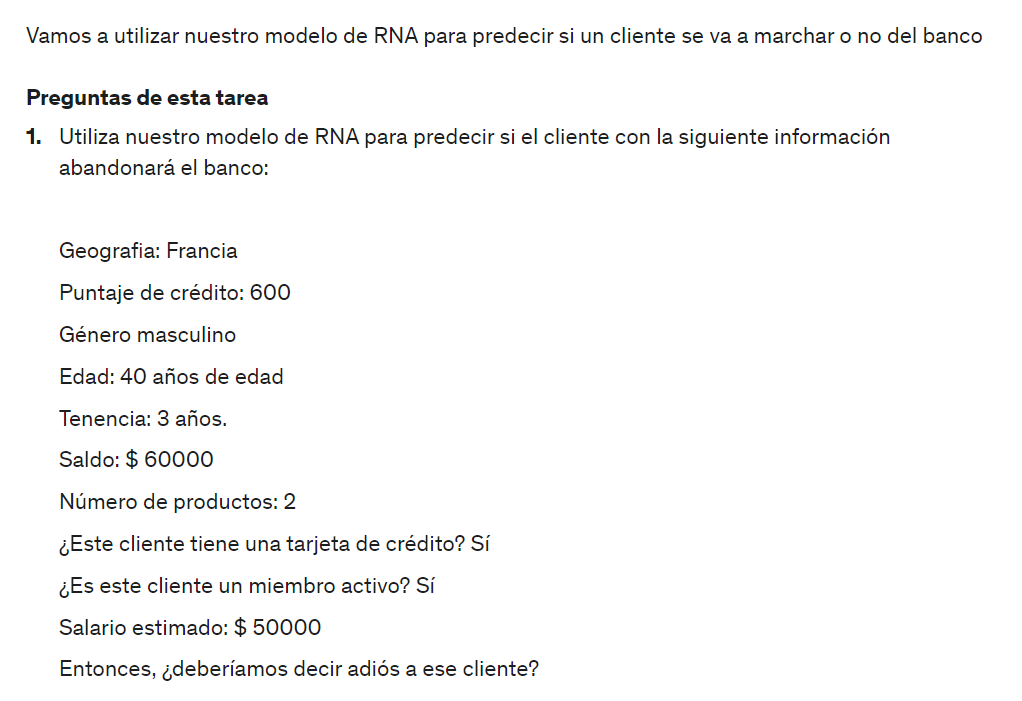

In [33]:
# si tuvieramos un conjunto de datos, lo unico que tendríamos que haceer es meterlo como matriz, la unica duda que tengo es que si hemos hecho el onehotencoder
# seguramente tendré que cambiar todos esas variables por las nuevas, además si está escalado lo tengo que escalar como vemos debajo. 
# entiendo que tendriamos que darle a estas variables el valor adecuado. 
# sabemos que la primera linea era francés, lo que vamos a hacer es sacar esa linea para ver el orden de las columnas. 
dataset.iloc[0,:].values  # primera fila y todas las columnas. 

array([1, 15634602, 'Hargrave', 619, 'France', 'Female', 42, 2, 0.0, 1, 1,
       1, 101348.88, 1], dtype=object)

In [34]:
# como le hemos hecho un onehotencoder tenemos que ver su analogo después de hecho. lo hemos hecho en los anteriores pasos. 
X[0,:] # recordamos que hemos quitado los datos que no nos interesaban y que empezamos en el score que es 619

array([0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

In [37]:
# lo que vamos a meter es una matriz, que contiene solo una fila, y tantas columnas como datos tengamos. 
# le hemos metido los datos traducidos al onehotencoder y le metemos el transform del escalado

new_prediction = classifier.predict(sc_X.transform(np.array([[0,0,600,1, 40,3, 60000, 2, 1, 1, 50000]]))) # el primer corchete es para indicar la matriz, el segundo corchete para indicar la fila. 
# 0,0 porque es Francia, 600 el valor, 1 porque els masculino, y los demás datos son los normales. 
# ahora lo que tenemos dentro del parentesis tienen que ser los datos del cliente que estamos tratando. 
# si tuviera un conjunto de cliente igual. 
# tenemos 11 datos de entrada según hemos visto anteriormente. 
print( new_prediction > 0.5 )
print(new_prediction)
# nos dice el cliente no se va del banco. 
# la probabilidad está por debajo del 0.5

[[False]]
[[0.04350122]]


nada, aqui volvemos a hacer la matriz de confusión que hicimos en la parte anterior. 

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
(cm[0][0]+cm[1][1])/cm.sum()

0.8655

## Parte 4 - Evaluar, mejorar y Ajustar la RNA


### Evaluar la **RNA**


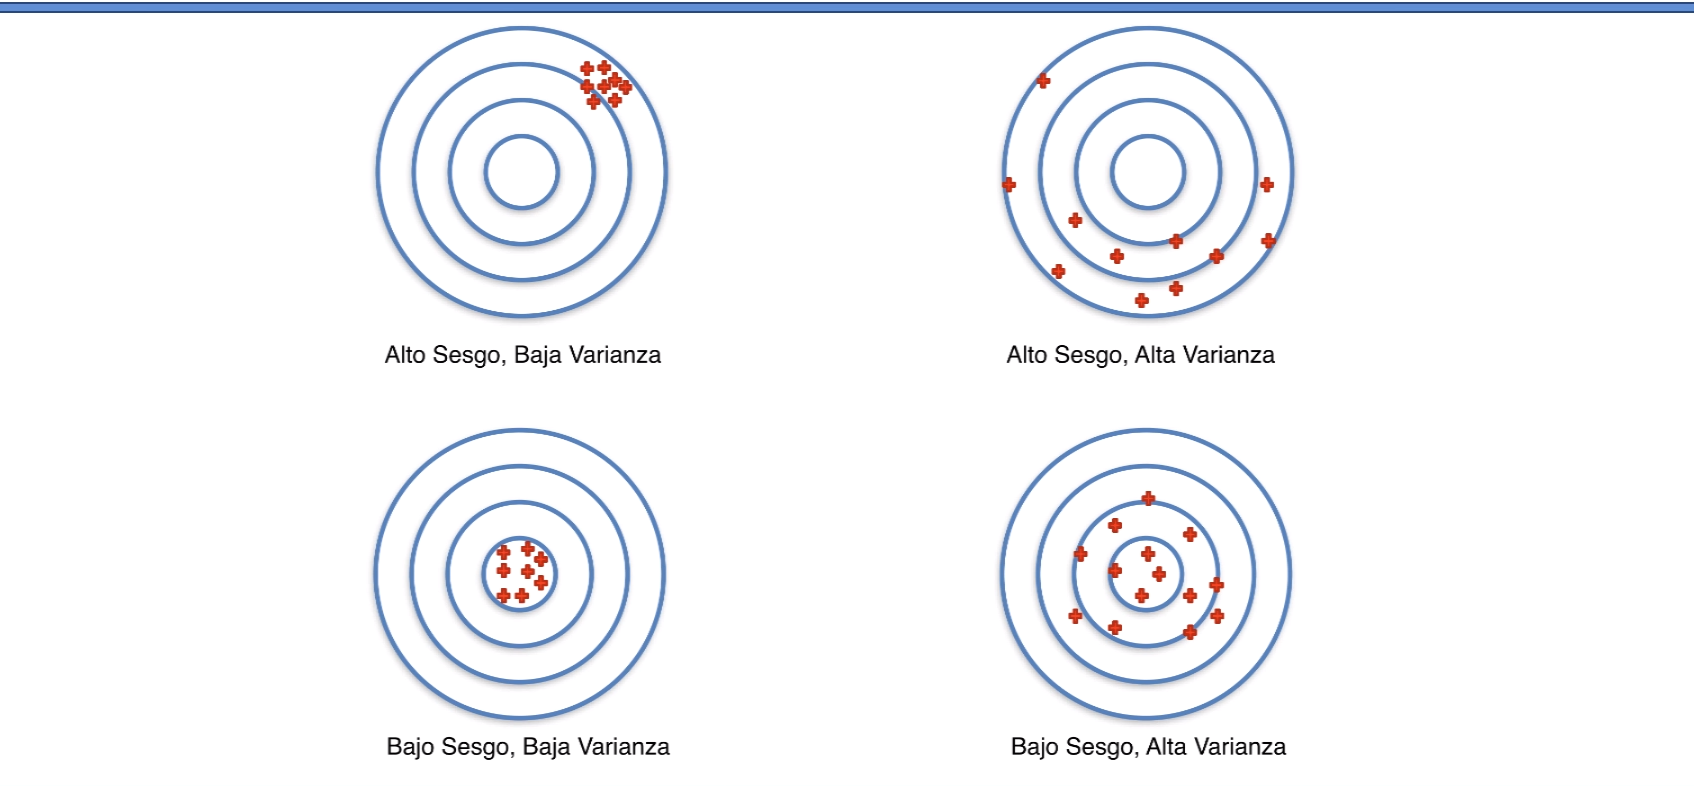

baja varianza y bajo sesgo es lo mejor, lo pero arriba derecha, alta varianza alto sesgo. es decir alta varianza quiere decir que cada vez que lo ejecutemos nos va a dar datos o probabilidades diferentes y dispares. 
por ello vamos a utilizar cross validation. es decir no vamos a dividir entre train y test. 

para hacer todo esto de abajo, tenemos que ejecutar todo de nuevo, ya que no tenemos que dividir en entrenamiento y test. 
dicho de otra manera lo podemos también cargar debajo de nuevo

In [20]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [21]:
def build_classifier(): # crearmos una función para crear el clasificador de la red neuronal. 
  classifier = Sequential()
  classifier.add(Dense(units = 6, kernel_initializer = "uniform", activation = "relu", input_dim = 11))
  classifier.add(Dense(units = 6, kernel_initializer = "uniform", activation = "relu"))
  classifier.add(Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid"))
  classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
  return classifier # aqui devolvemos el classifier

In [22]:
# esto lo hicmos en el caso anterior con test y train, ahora solo lo hacemos con los fold correspondientes. 
# en resumen sacamos del entrenamiento el total, y en cada uno decidimos cual es la predicción . luego sacará una media. 
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, nb_epoch = 100)
# aqui calculamos el vector de precisiones. 
accuracies = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1, verbose = 1)
# normalmente cv suele ser 10, que es el numero de folds. njobs si ponemos -1, utilizar todos los cores es decir toda la potencia. 
# lo que vamos a evaluar es si la precisión es parecida con la anterior, y además veremos la varianza. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   28.1s finished


In [26]:
accuracies # son inferiores a las anteriores. 

array([0.78625   , 0.79000002, 0.80000001, 0.78250003, 0.81625003,
       0.81      , 0.78750002, 0.79374999, 0.80874997, 0.79500002])

In [23]:
mean = accuracies.mean()
variance = accuracies.std() # estamos calculando la desviación estandar. 

In [25]:
print(mean) # la precisión es menor que la anterior. 
print(variance) # la varianza es baja en torno al 1 por ciento. 

0.7970000088214875
0.010799301167471697


### Mejorar la RNA

#### Regularización de Dropout para evitar el *overfitting*
normalmente funciona bien en el train, pero en el test o en nuevas observaciones no. 
no lo vamos a ver en el codigo pero si lo explica en la clase 40


en este caso no tiene una varianza muy alta no tendríamos que hacerlo, pero bueno lo hacemos para prácticar.

### Ajustar la *RNA*


lo que vamos a hacer es modificar son los hiperparametros. 

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
def build_classifier(optimizer):
  classifier = Sequential()
  classifier.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu", input_dim = 11))
  classifier.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))
  classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))
  classifier.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])
  return classifier


In [30]:
classifier = KerasClassifier(build_fn = build_classifier)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [31]:
"""# estos son los hiperparametros  que queremos optimizar y los metemos en una dirección. 
parameters = {
    'batch_size' : [25,32 ], # en este caso en vez de 10 vamos a poner 25 y 32 se suelen poner potencias de 2, que 25 no lo es. 
    'nb_epoch' : [100, 200], # antes teniamos 100 ahora ponemos 100 y 500 
    'optimizer' : ['adam', 'rmsprop'] # en este caso ponemos el de adam qe utilizamos antes y ponemos además rmsprop pero en el parentesis de la función  ponemos optimizer
    # el rmsprop es para hallar el maximo de las proporciones, el error maximo 
}"""

In [33]:
# estos son los hiperparametros  que queremos optimizar y los metemos en una dirección. 
parameters = {
    'batch_size' : [25], # en este caso en vez de 10 vamos a poner 25 y 32 se suelen poner potencias de 2, que 25 no lo es. 
    'nb_epoch' : [100], # antes teniamos 100 ahora ponemos 100 y 500 
    'optimizer' : ['adam'] # en este caso ponemos el de adam qe utilizamos antes y ponemos además rmsprop pero en el parentesis de la función  ponemos optimizer
    # el rmsprop es para hallar el maximo de las proporciones, el error maximo 
}

In [34]:
grid_search = GridSearchCV(estimator = classifier, 
                           param_grid = parameters, 
                           scoring = 'accuracy', 
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
# seguramente en colab no lo podamos hacer ya que a la hora nos echa....
# lo ideal sería hacerlo en nuestra maquina con spark, creo que se llama el programa......

320/320 [==============================] - 1s 2ms/step - loss: 0.5382 - accuracy: 0.7959
